<a href="https://colab.research.google.com/github/barta3235/working_model_vit/blob/main/working_model_vit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, applications, Model
from tensorflow.keras.models import Model
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
!pip install lime

<ipython-input-1-e93ab880760a>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=87f8902507c9eda14093c6786e851fe343645e324761a1ef461ce3d44885a59f
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('/content/drive/MyDrive/499_PCOS_Dataset/Infected')
X = []
y = []
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])
os.chdir('/content/drive/MyDrive/499_PCOS_Dataset/Non Infected')
for i in tqdm(os.listdir()):
      img = cv2.imread(i)
      img = cv2.resize(img,(224,224))
      X.append(img)
print(len(X))
for i in range(1,1194):
    y.append('N')
print(y)

  0%|          | 0/805 [00:00<?, ?it/s]

Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y


  0%|          | 0/1193 [00:00<?, ?it/s]

1998
['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',

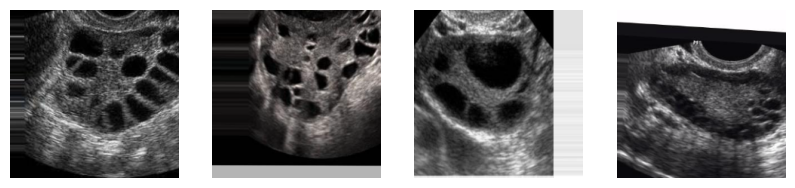

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (1338, 224, 224, 3)
X_test Shape:  (660, 224, 224, 3)
y_train Shape:  (1338, 2)
y_test Shape:  (660, 2)


In [77]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

def create_advanced_vit_model(input_shape=(224, 224, 3), num_classes=2):
    inputs = tf.keras.Input(shape=input_shape)

    # Implement the embedding layer for patches
    embedding_patches = layers.Conv2D(128, kernel_size=(16, 16), strides=(16, 16), activation="relu")(inputs)

    transformer_blocks = []
    for _ in range(32):
        attention_output = layers.MultiHeadAttention(num_heads=16, key_dim=128, dropout=0.1)(
            embedding_patches, embedding_patches, embedding_patches
        )

        #positional embeddings
        position_embeddings = layers.Embedding(input_dim=14*14, output_dim=128)(tf.range(0, 14*14))
        position_embeddings = tf.reshape(position_embeddings, (1, 14, 14, 128))
        attention_output += position_embeddings
        attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output)
        attention_output = layers.Activation("relu")(attention_output)

        #spatial attention
        spatial_attention = layers.Conv2D(1, kernel_size=(1, 1), activation="sigmoid")(attention_output)
        attention_output = layers.Multiply()([attention_output, spatial_attention])

        #residual connection
        transformer_output = layers.Add()([attention_output, embedding_patches])
        transformer_output = layers.LayerNormalization(epsilon=1e-6)(transformer_output)
        transformer_output = layers.Activation("relu")(transformer_output)
        transformer_blocks.append(transformer_output)

    # Global Average Pooling
    representation = layers.GlobalAveragePooling2D()(transformer_blocks[-1])

    representation = layers.Dense(2048, activation="relu", kernel_regularizer=regularizers.l2(0.01))(representation)
    representation = layers.Dropout(0.5)(representation)
    representation = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.01))(representation)
    representation = layers.Dropout(0.5)(representation)
    representation = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.01))(representation)
    representation = layers.Dropout(0.5)(representation)
    outputs = layers.Dense(num_classes, activation="softmax")(representation)


    model = models.Model(inputs=inputs, outputs=outputs)
    return model


In [78]:
vit_model = create_advanced_vit_model()
vit_model.summary()

Model: "model_24"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_120 (InputLayer)      [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_332 (Conv2D)         (None, 14, 14, 128)          98432     ['input_120[0][0]']           
                                                                                                  
 multi_head_attention_518 (  (None, 14, 14, 128)          1054848   ['conv2d_332[0][0]',          
 MultiHeadAttention)                                                 'conv2d_332[0][0]',          
                                                                     'conv2d_332[0][0]']          
                                                                                           

In [79]:
vit_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

In [80]:
history =vit_model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
42/42 [==============================] - 192s 4s/step - loss: 11.0155 - accuracy: 0.5374 - true_negatives_6: 719.0000 - false_positives_6: 619.0000 - specificity_at_sensitivity_6: 0.5680 - val_loss: 4.1889 - val_accuracy: 0.4106 - val_true_negatives_6: 271.0000 - val_false_positives_6: 389.0000 - val_specificity_at_sensitivity_6: 0.0000e+00
Epoch 2/5
42/42 [==============================] - 206s 5s/step - loss: 2.6233 - accuracy: 0.5897 - true_negatives_6: 789.0000 - false_positives_6: 549.0000 - specificity_at_sensitivity_6: 0.6555 - val_loss: 1.6864 - val_accuracy: 0.5894 - val_true_negatives_6: 389.0000 - val_false_positives_6: 271.0000 - val_specificity_at_sensitivity_6: 0.5894
Epoch 3/5
42/42 [==============================] - 202s 5s/step - loss: 1.3168 - accuracy: 0.6009 - true_negatives_6: 804.0000 - false_positives_6: 534.0000 - specificity_at_sensitivity_6: 0.6652 - val_loss: 1.0671 - val_accuracy: 0.5894 - val_true_negatives_6: 389.0000 - val_false_positives_6: 271